In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#df1 = pd.read_csv('cherry_transport.csv')
df2 = pd.read_csv('eastdallas_transport2.csv')
df3 = pd.read_csv('fool_transport2.csv')
df4 = pd.read_csv('halfmoon04_transport.csv')
df5 = pd.read_csv('halfmoon15_transport.csv')
df6 = pd.read_csv('hayden_transport2.csv')
df7 = pd.read_csv('littlegranite02_transport.csv')
df8 = pd.read_csv('littlegranite99_transport.csv')
df9 = pd.read_csv('stlouislower_transport.csv')
df10 = pd.read_csv('stlouisupper_transport2.csv')

In [31]:
df = pd.concat([df2,df3,df4,df5,df6,df7,df8,df9,df10])

In [37]:
xx1 = np.arange(0.6, 1.8, 0.01)
yy1 = 0.0015*xx1**7.5
xx2 = np.arange(1.79, 5, 0.01)
yy2 = 14*(1-(1.0386/xx2**0.9))**5

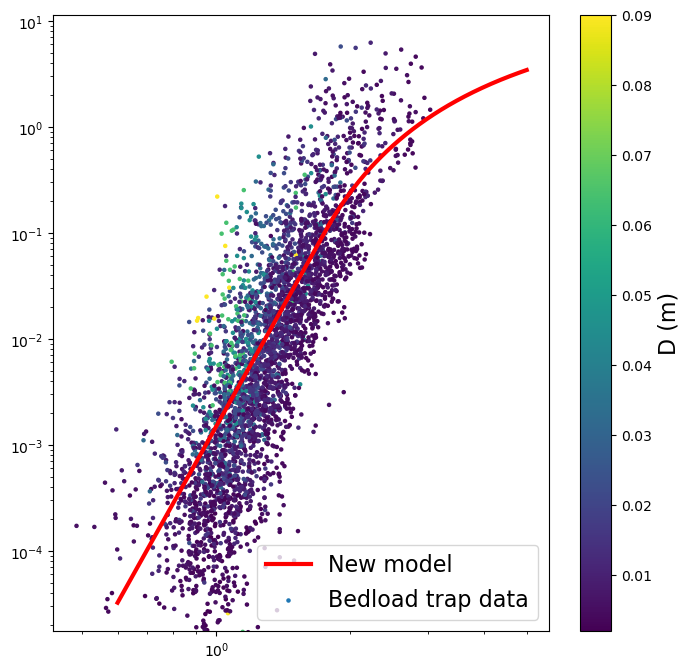

In [39]:
fig, ax = plt.subplots(figsize=(8,8))
pts = ax.scatter(df['gs_ratio'], df['Wi_star'], c=df['D'], s=5, label='Bedload trap data')
ax.plot(xx1, yy1, c='r', linewidth=3, label='New model')
ax.plot(xx2, yy2, c='r', linewidth=3)
#ax.axvline(1.8)
plt.xscale('log')
plt.yscale('log')
cbar = fig.colorbar(pts).set_label('D (m)', fontsize=16)
plt.legend(loc='lower right', fontsize=16)
plt.show()

In [45]:
df.to_csv('transport_data_for_function.csv')

In [51]:
newdf = pd.read_csv('transport_data_for_function.csv')

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
train, test = train_test_split(newdf, test_size=0.1)

In [55]:
test['pred'] = 0
for i in test.index:
    if test.loc[i, 'gs_ratio'] < 1.8:
        test.loc[i, 'pred'] = 0.0015*test.loc[i, 'gs_ratio']**7.5
    elif test.loc[i, 'gs_ratio'] >= 1.8:
        test.loc[i, 'pred'] = 14*(1-(1.0386/test.loc[i, 'gs_ratio']**0.9))**5

In [56]:
test['residuals'] = test['pred']/test['Wi_star']

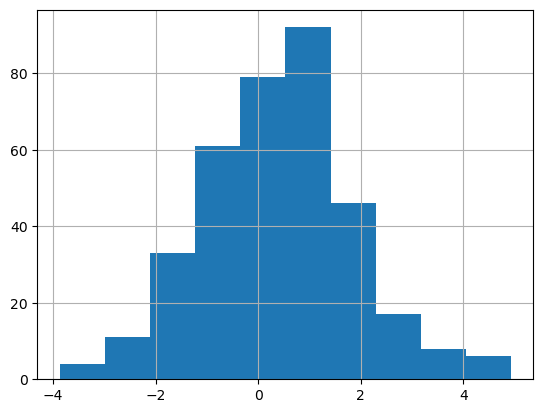

In [57]:
np.log(test['residuals']).hist()

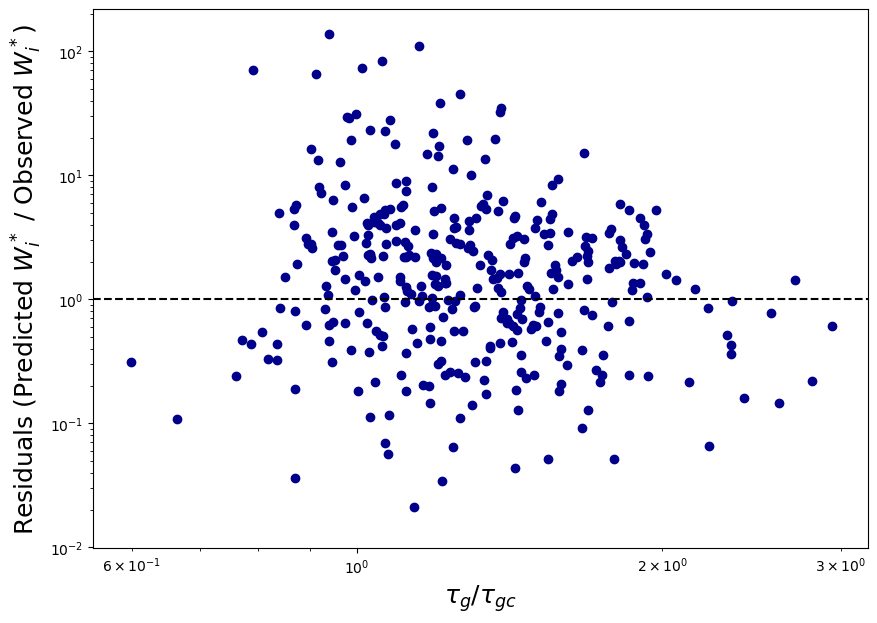

In [58]:
fig, ax = plt.subplots(figsize=(10,7))
pts = ax.scatter(test['gs_ratio'], test['residuals'], c='darkblue')
ax.axhline(1, c='k', linestyle='--')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\tau_g/\tau_{gc}$', fontsize=18)
ax.set_ylabel(r'Residuals (Predicted $W_i^*$ / Observed $W_i^*$)', fontsize=18)
#cbar = fig.colorbar(pts).set_label('D (m)', fontsize=16)
#plt.legend(loc='lower right', fontsize=16)
#plt.savefig('residuals_400pts.png', dpi=150)
plt.show()